In [62]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency, f_oneway
import utils_task33 as ut


In [63]:
hospitalization2_df = pd.read_csv("hospitalization2_Team_10.csv")
hospitalization2_df.head()

,unitName1,Admission_Entry_Date,Release_Date,unitName2,Admission_Entry_Date2,Release_Date2,Entry_Type,Patient_Origin,Release_Type,Releasing_Doctor,Admission_Days2,Diagnosis_In_Reception,Diagnosis_In_Release,ct,Admission_Days,Period_Between_Admissions
0,5,2021-02-16 17:33:45.570,2021-02-19 12:40:00,5,2021-02-24 15:03:30.490,2021-02-25 12:38:00,urgent,home,home,11023,1,"5370 , 7872 , 78720","5370 , 7872 , 78720",0,3,short
1,4,2022-08-07 13:27:58.780,2022-08-08 15:15:00,4,2022-09-01 04:20:51.617,2022-09-02 16:00:00,urgent,home,home,12517,1,78060,78060,0,1,long
2,5,2023-10-27 07:34:41.013,2023-10-29 17:18:00,5,2023-10-30 17:58:09.730,2023-11-01 15:33:00,urgent,home,home,11887,2,5119,"5119 , 514",0,2,short
3,3,2020-07-29 17:00:56.863,2020-08-03 14:26:00,3,2020-08-30 04:25:30.670,2020-09-03 13:45:00,urgent,home,home,10525,4,"2859 , 7807","486 , 5990",0,5,long
4,1,2021-07-03 11:42:24.973,2021-07-05 17:34:00,1,2021-07-13 01:21:32.077,2021-07-15 11:48:00,urgent,home,home,6890,2,7865,7865,1,2,mid


In [64]:
# Convert dates to datetime format
hospitalization2_df['Admission_Entry_Date'] = pd.to_datetime(hospitalization2_df['Admission_Entry_Date'])
hospitalization2_df['Release_Date'] = pd.to_datetime(hospitalization2_df['Release_Date'])
hospitalization2_df['Admission_Entry_Date2'] = pd.to_datetime(hospitalization2_df['Admission_Entry_Date2'])
hospitalization2_df['Release_Date2'] = pd.to_datetime(hospitalization2_df['Release_Date2'])

In [65]:
hospitalization2_df.dtypes

unitName1                             int64
Admission_Entry_Date         datetime64[ns]
Release_Date                 datetime64[ns]
unitName2                             int64
Admission_Entry_Date2        datetime64[ns]
Release_Date2                datetime64[ns]
Entry_Type                           object
Patient_Origin                       object
Release_Type                         object
Releasing_Doctor                      int64
Admission_Days2                       int64
Diagnosis_In_Reception               object
Diagnosis_In_Release                 object
ct                                    int64
Admission_Days                        int64
Period_Between_Admissions            object
dtype: object

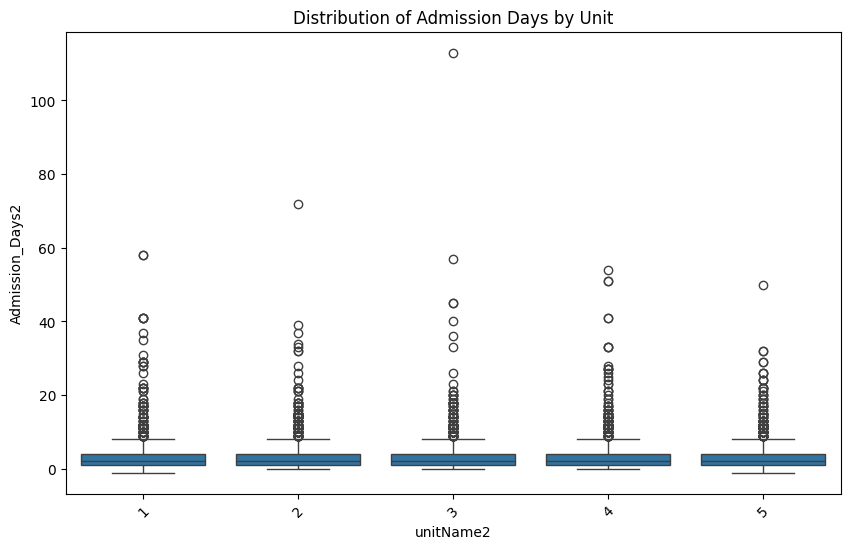

In [66]:

# Boxplot to visualize the distribution of Admission_Days2 for each unitName2
plt.figure(figsize=(10, 6))
sns.boxplot(data=hospitalization2_df, x='unitName2', y='Admission_Days2')
plt.xticks(rotation=45)  # Rotate the labels if there are many units
plt.title('Distribution of Admission Days by Unit')
plt.show()


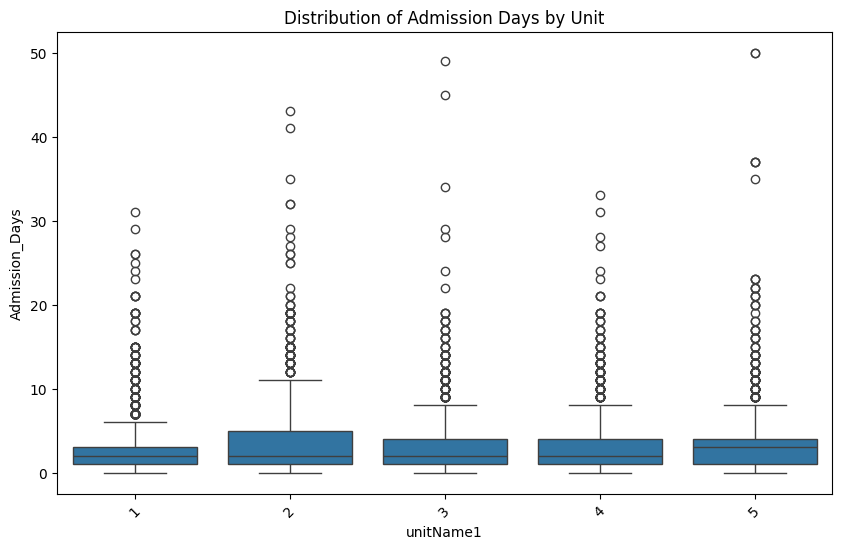

In [67]:

# Boxplot to visualize the distribution of Admission_Days for each unitName1
plt.figure(figsize=(10, 6))
sns.boxplot(data=hospitalization2_df, x='unitName1', y='Admission_Days')
plt.xticks(rotation=45)  # Rotate the labels if there are many units
plt.title('Distribution of Admission Days by Unit')
plt.show()

C:\Users\97254\AppData\Local\Temp\ipykernel_34444\3030763561.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=rehospitalizations_per_unit.index, y=rehospitalizations_per_unit.values, palette='viridis')


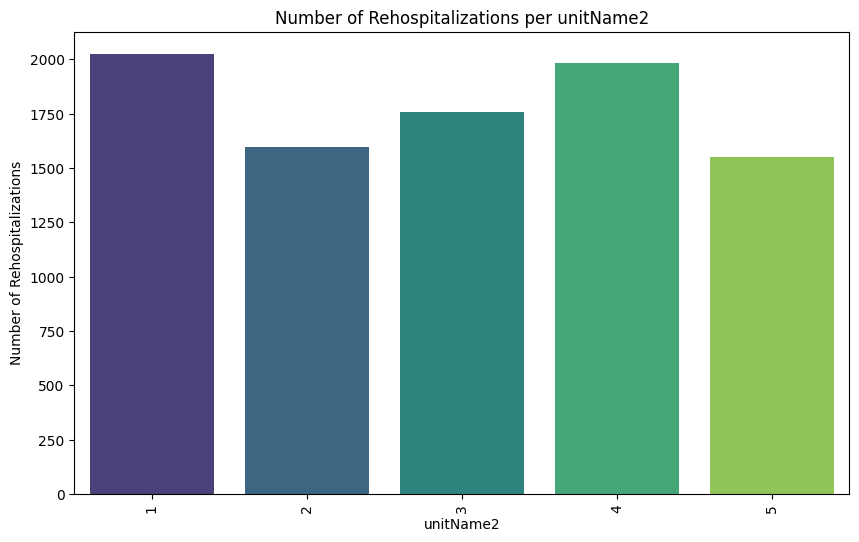

In [68]:

# Count the number of rehospitalizations per unitName2
rehospitalizations_per_unit = hospitalization2_df['unitName2'].value_counts()

# Plot the rehospitalizations per unitName2
plt.figure(figsize=(10, 6))
sns.barplot(x=rehospitalizations_per_unit.index, y=rehospitalizations_per_unit.values, palette='viridis')

# Set labels and title
plt.xlabel('unitName2')
plt.ylabel('Number of Rehospitalizations')
plt.title('Number of Rehospitalizations per unitName2')
plt.xticks(rotation=90)  # Rotate x labels if necessary
plt.show()


We can see from the graph that units 1 and 4 had the most rehospitalizations, while the other units are not far behind.

In [69]:

# Display the results in a nice table
results_df = ut.show_statistics(hospitalization2_df, 'unitName2')
results_df


C:\Users\97254\AppData\Roaming\Python\Python39\site-packages\scipy\stats\_stats_py.py:4167: ConstantInputWarning: Each of the input arrays is constant;the F statistic is not defined or infinite
  warnings.warn(stats.ConstantInputWarning(msg))


,Feature,Test,Statistic,p-value
0,unitName1,ANOVA,inf,0.000000e+00
1,Admission_Entry_Date,Chi-Square,3.566000e+04,2.099399e-189
2,Release_Date,Chi-Square,3.529397e+04,9.279979e-195
3,Admission_Entry_Date2,Chi-Square,3.509740e+04,5.206423e-93
4,Release_Date2,Chi-Square,3.479540e+04,3.313554e-95
5,Entry_Type,Chi-Square,3.309282e+01,5.926105e-05
6,Patient_Origin,Chi-Square,6.096996e+01,3.589562e-07
7,Release_Type,Chi-Square,1.185976e+01,1.842514e-02
8,Releasing_Doctor,ANOVA,1.795715e+02,3.291472e-148
9,Admission_Days2,ANOVA,2.738152e+00,2.716491e-02


It seems that all the parameters have a great impact relating to the unit that recevied the patient in the rehospitalization observing the p-value.


Decomposition for unit 1:


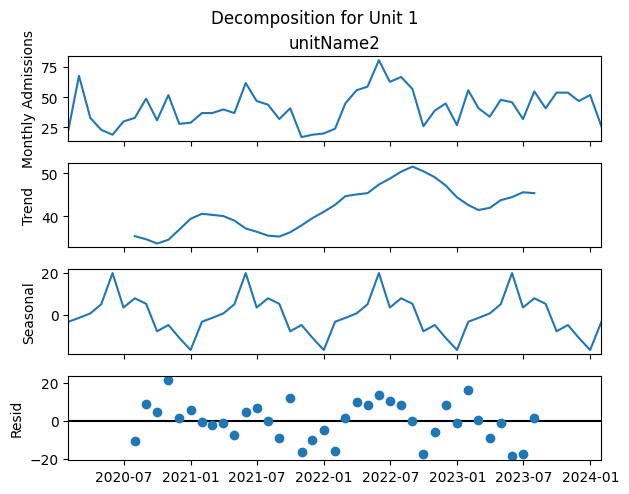

Decomposition for unit 2:


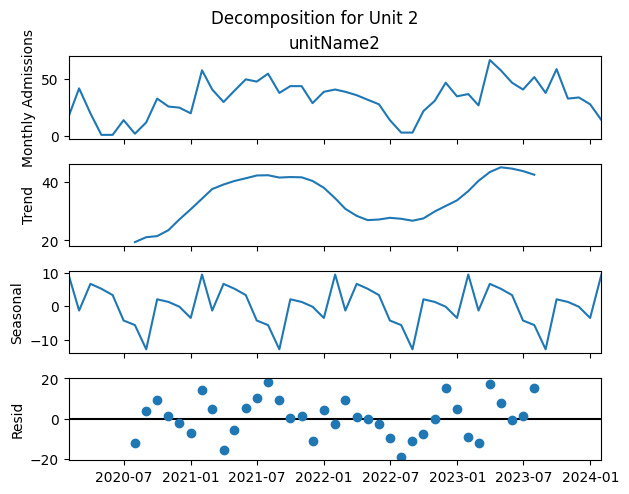

Decomposition for unit 3:


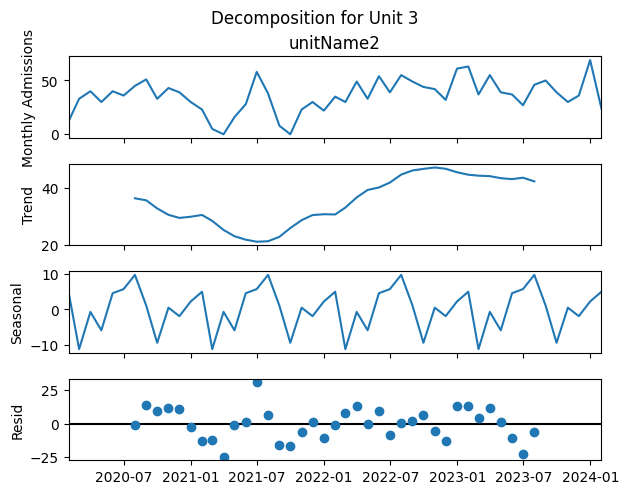

Decomposition for unit 4:


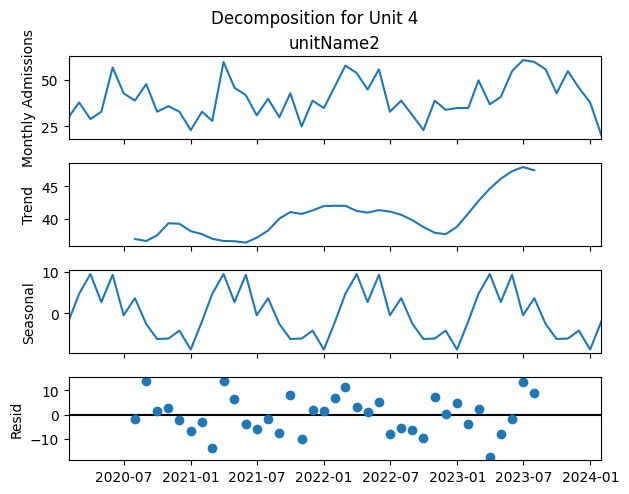

Decomposition for unit 5:


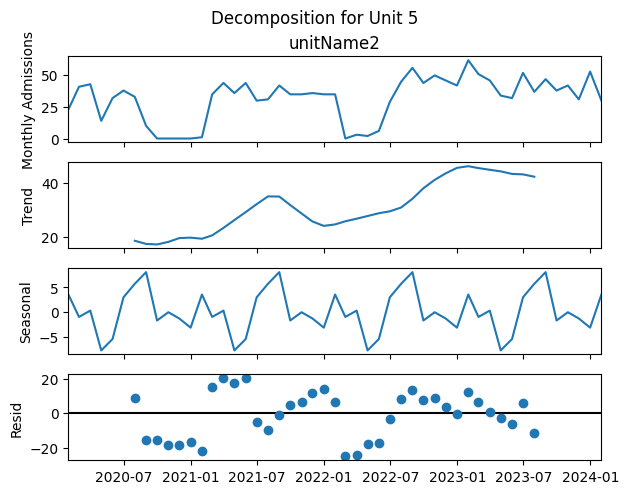

In [70]:


import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

# Ensure the dates are in datetime format
hospitalization2_df['Admission_Entry_Date2'] = pd.to_datetime(hospitalization2_df['Admission_Entry_Date2'])

# Set 'Admission_Entry_Date2' as the index
hospitalization2_df.set_index('Admission_Entry_Date2', inplace=True)

# Automatically detect unique units and sort them
units = sorted(hospitalization2_df['unitName2'].unique())  # Sorting units

# Loop over each unit to perform decomposition
for unit in units:
    # Filter the DataFrame for the current unit
    unit_data = hospitalization2_df[hospitalization2_df['unitName2'] == unit]
    
    # Resample the data to a monthly frequency
    monthly_admissions = unit_data['unitName2'].resample('M').count()

    # Decompose the time series
    if len(monthly_admissions) > 1:  # Ensure there's enough data for decomposition
        decomposed = seasonal_decompose(monthly_admissions, model='additive')

        # Plot the decomposition
        print(f"Decomposition for unit {unit}:")
        fig = decomposed.plot()
        fig.suptitle(f"Decomposition for Unit {unit}", y=1.02)

        # Access the first (observed) plot and set the y-label
        fig.axes[0].set_ylabel("Monthly Admissions")

        plt.show()
    else:
        print(f"Not enough data for decomposition for unit {unit}")



In the last five graphs, we observe the seasonality patterns of the five different hospital units over a period of almost four years. The Trend graphs reveal that the number of admissions increases year over year in each unit. Although this increase is not constant throughout the period, the overall trend is upward.

In the Seasonality graphs, we see that each unit experiences different periods of heightened rehospitalizations:

* Unit 1 shows a significant peak in rehospitalizations around May and June.
* Unit 2 experiences most rehospitalizations approximately between September and May.
* Unit 3 has peaks in July, with a smaller peak in January.
* Unit 4 sees a sustained period of high rehospitalizations from March to August.
* Unit 5 has peaks in February and August.

Each unit displays its own unique seasonality, with varying peak times throughout the year.